In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
teis_p = pd.read_csv('../data/teis_p.csv')
teis_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96580 entries, 0 to 96579
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   POE                        96580 non-null  object
 1   Child ID                   96580 non-null  int64 
 2   DOB                        96580 non-null  object
 3   County Name                96576 non-null  object
 4   County SES                 96576 non-null  object
 5   Child Phase                96580 non-null  object
 6   Active                     96580 non-null  object
 7   Service Coordinator        96579 non-null  object
 8   Notification Date          96580 non-null  object
 9   Parent Consent Date        70026 non-null  object
 10  Referral Source Type Name  96580 non-null  object
 11  Initial Eligibility        68221 non-null  object
 12  Initial Eligibility Date   68221 non-null  object
 13  Initial IFSP Date          45493 non-null  object
 14  Latest

In [3]:
teis_c = pd.read_csv('../data/teis_c.csv')
teis_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113256 entries, 0 to 113255
Data columns (total 34 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   POE                          113256 non-null  object 
 1   Child ID                     113256 non-null  int64  
 2   DOB                          113256 non-null  object 
 3   County Name                  113251 non-null  object 
 4   County SES                   113251 non-null  object 
 5   Child Phase                  113256 non-null  object 
 6   Active                       113256 non-null  object 
 7   Service Coordinator          113255 non-null  object 
 8   Notification/ Referral Date  113256 non-null  object 
 9   Parent Consent Date          58101 non-null   object 
 10  Referral Source Type Name    113256 non-null  object 
 11  Initial Eligibility          40762 non-null   object 
 12  Initial Eligibility Date     40762 non-null   object 
 13 

In [4]:
teis_c = teis_c.rename(columns = {'Notification/ Referral Date' : 'Notification Date'})
teis_p = teis_p.rename(columns = {'County SES ' : 'County SES'})

In [5]:
teis_merge = pd.merge(teis_c, teis_p, how='outer')
teis_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191578 entries, 0 to 191577
Data columns (total 34 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   POE                          191578 non-null  object 
 1   Child ID                     191578 non-null  int64  
 2   DOB                          191578 non-null  object 
 3   County Name                  191570 non-null  object 
 4   County SES                   191570 non-null  object 
 5   Child Phase                  191578 non-null  object 
 6   Active                       191578 non-null  object 
 7   Service Coordinator          191577 non-null  object 
 8   Notification Date            191578 non-null  object 
 9   Parent Consent Date          127024 non-null  object 
 10  Referral Source Type Name    191578 non-null  object 
 11  Initial Eligibility          107265 non-null  object 
 12  Initial Eligibility Date     107265 non-null  object 
 13 

In [6]:
full_teis= pd.concat([teis_c, teis_p])

In [7]:
#full_teis.to_csv('../data/full_teis.csv')

In [8]:
#teis_confused = full_teis[full_teis.duplicated(['Child ID', 'Notification Date'], keep=False)]
#teis_confused.info()
#teis_confused.to_csv('../data/teis_confused.csv')

In [9]:
teis_clean = full_teis[~full_teis.duplicated(['POE', 'Child ID', 'DOB', 'County Name', 'County SES', 'Child Phase',
       'Active', 'Service Coordinator', 'Notification Date',
       'Parent Consent Date', 'Referral Source Type Name',
       'Initial Eligibility', 'Initial Eligibility Date', 'Initial IFSP Date',
       'Latest IFSP Date', 'Exit Reason', 'Exit Date'])]
teis_clean.info()
#pulling out rows that are the same across all columns that the two dataframes share

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191578 entries, 0 to 96579
Data columns (total 34 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   POE                          191578 non-null  object 
 1   Child ID                     191578 non-null  int64  
 2   DOB                          191578 non-null  object 
 3   County Name                  191570 non-null  object 
 4   County SES                   191570 non-null  object 
 5   Child Phase                  191578 non-null  object 
 6   Active                       191578 non-null  object 
 7   Service Coordinator          191577 non-null  object 
 8   Notification Date            191578 non-null  object 
 9   Parent Consent Date          127024 non-null  object 
 10  Referral Source Type Name    191578 non-null  object 
 11  Initial Eligibility          107265 non-null  object 
 12  Initial Eligibility Date     107265 non-null  object 
 13  

In [10]:
import re
from tqdm.notebook import tqdm

In [11]:
for ind, row in tqdm(teis_clean.iterrows()):
    if re.search('\d{5}', str(row['Exit Date'])):
        teis_clean.loc[ind, 'Exit Date'] = np.NaN
#this is clearing out the weird data that's in the 'Exit Date' column

0it [00:00, ?it/s]

In [12]:
teis_clean[['DOB', 'Notification Date', 'Parent Consent Date', 'third DOB', 'Exit Date']] = teis_clean[['DOB', 'Notification Date', 'Parent Consent Date', 'third DOB', 'Exit Date']].apply(pd.to_datetime)
teis_clean

C:\Users\dada2\AppData\Local\Temp\ipykernel_5664\1059363929.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  teis_clean[['DOB', 'Notification Date', 'Parent Consent Date', 'third DOB', 'Exit Date']] = teis_clean[['DOB', 'Notification Date', 'Parent Consent Date', 'third DOB', 'Exit Date']].apply(pd.to_datetime)


,POE,Child ID,DOB,County Name,County SES,Child Phase,Active,Service Coordinator,Notification Date,Parent Consent Date,...,Service Coordinator Counter,Fiscal Year.1,Child Count,2012 Child Count,2013 Child Count,third DOB,Late Referral,Qtr,QTR,Referral Source Category
0,ET,403339,2014-08-09,Blount,Transitional,Eligibility,A,Kristi Borer,2016-07-01,2016-07-01,...,1.0,2016.0,1.0,NaN,NaN,2017-08-09,NaN,1.0,Qtr 1,#REF!
1,FT,404085,2013-07-31,Unicoi,At-Risk,Notification,I,Jennifer Terranera - 45 days,2016-07-01,NaT,...,1.0,2016.0,1.0,NaN,NaN,2016-07-31,1.0,1.0,Qtr 1,#REF!
2,FT,403623,2016-02-05,Sullivan,Transitional,Eligibility,A,Amy Talbert,2016-07-01,2016-07-20,...,1.0,2016.0,1.0,NaN,NaN,2019-02-05,NaN,1.0,Qtr 1,#REF!
3,FT,404157,2015-12-06,Sullivan,Transitional,IFSP,A,Candice Cradic,2016-07-01,2016-07-22,...,1.0,2016.0,1.0,NaN,NaN,2018-12-06,NaN,1.0,Qtr 1,#REF!
4,FT,404154,2015-04-18,Hawkins,At-Risk,IFSP,A,Kathy Jeffries,2016-07-01,2016-07-18,...,1.0,2016.0,1.0,NaN,NaN,2018-04-18,NaN,1.0,Qtr 1,#REF!
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96572,UC,523485,2019-10-23,Sumner,Competitive,IFSP,A,Miriam Espinosa,2022-03-02,2022-03-10,...,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
96573,UC,528430,2022-01-05,Cumberland,Transitional,IFSP,A,Lisa Davis,2022-05-10,2022-05-18,...,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
96574,UC,515685,2019-08-14,Sumner,Competitive,IFSP,A,Cindy Willard,2021-12-01,2021-12-07,...,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
96577,UC,525460,2019-08-27,Sumner,Competitive,Notification,I,Sherry Roberts-DS,2022-03-29,NaT,...,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN


In [13]:
teis_clean = teis_clean.drop(columns = ['2012 Child Count', '2013 Child Count', 'Service Coordinator Counter', 'Referral Count',
                                        'Evaluation Count', 'Eligibility Count', 'IFSP Count', 'Child Count', ' QTR ', 
                                       'Referral Source Category'])
teis_clean.head(2)
#there isn't meaningful data in these columns (at least not for the purposes of this project)

,POE,Child ID,DOB,County Name,County SES,Child Phase,Active,Service Coordinator,Notification Date,Parent Consent Date,...,Latest IFSP Date,Exit Reason,Exit Date,Fiscal Year,Notification Month,Tenn Region,Fiscal Year.1,third DOB,Late Referral,Qtr
0,ET,403339,2014-08-09,Blount,Transitional,Eligibility,A,Kristi Borer,2016-07-01,2016-07-01,...,NaN,NaN,NaT,2016-2017,Jul,Eastern,2016.0,2017-08-09,NaN,1.0
1,FT,404085,2013-07-31,Unicoi,At-Risk,Notification,I,Jennifer Terranera - 45 days,2016-07-01,NaT,...,NaN,Referral less than 45 days,2016-07-01,2016-2017,Jul,Eastern,2016.0,2016-07-31,1.0,1.0


In [14]:
all_teis_dups = teis_clean[teis_clean.duplicated(['Child ID', 'Notification Date'], keep=False)].sort_values('Child ID')
all_teis_dups
#pulling all rows that have 'Child ID' and 'Notification Date' in common to take a look

,POE,Child ID,DOB,County Name,County SES,Child Phase,Active,Service Coordinator,Notification Date,Parent Consent Date,...,Latest IFSP Date,Exit Reason,Exit Date,Fiscal Year,Notification Month,Tenn Region,Fiscal Year.1,third DOB,Late Referral,Qtr
437,NW,351755,2013-11-13,Madison,Transitional,Evaluation,A,Rene Bard,2016-07-12,2016-07-12,...,NaN,NaN,NaT,2016-2017,Jul,Western,2016.0,2016-11-13,NaN,1.0
8367,NW,351755,2013-11-13,Madison,Transitional,Eligibility,I,Rene Bard,2016-07-12,2016-07-12,...,NaN,Ineligible for Part C,2016-08-25,NaN,NaN,NaN,NaN,NaT,NaN,NaN
13240,UC,353805,2013-12-04,Putnam,Transitional,IFSP,I,Anna Bolin,2016-08-05,2016-08-15,...,NaN,618 - Part B eligibility not determined,2016-12-03,NaN,NaN,NaN,NaN,NaT,NaN,NaN
1552,UC,353805,2013-12-04,Putnam,Transitional,Evaluation,A,Anna Bolin,2016-08-05,2016-08-15,...,NaN,NaN,NaT,2016-2017,Aug,Middle,2016.0,2016-12-04,NaN,1.0
4142,MD,353900,2013-10-09,Shelby,Transitional,Notification,I,JoAnn Hinkle-DA,2016-09-29,NaT,...,NaN,Referral less than 45 days,2016-09-29,2016-2017,Sep,Western,2016.0,2016-10-09,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95952,UC,529587,2022-03-15,Sumner,Competitive,Eligibility,I,Sherry Roberts-DS,2022-05-31,2022-06-08,...,NaN,Ineligible for Part C,2022-06-24,NaN,NaN,NaN,NaN,NaT,NaN,NaN
93343,SE,529597,2020-04-10,McMinn,Transitional,Eligibility,I,Jennifer Rose - ES,2022-05-31,2022-06-04,...,NaN,Ineligible for Part C,2022-06-27,NaN,NaN,NaN,NaN,NaT,NaN,NaN
112947,SE,529597,2020-04-10,McMinn,Transitional,Notification,A,Signal Centers-EEA,2022-05-31,NaT,...,NaN,NaN,NaT,2021-2022,May,Eastern,2021.0,2023-04-10,NaN,4.0
81090,FT,529609,2020-05-13,Washington,Transitional,Notification,I,Alicia Taylor - Admin,2022-05-31,NaT,...,NaN,Unable to contact,2022-07-01,NaN,NaN,NaN,NaN,NaT,NaN,NaN


In [15]:
num_all_dup = len(np.unique(np.array(all_teis_dups['Child ID'])))
num_all_dup

76054

In [16]:
county_dups = all_teis_dups[~all_teis_dups.duplicated(['County Name', 'Child ID', 'Notification Date'], keep=False)]
county_dups
#These are instances when the same referral was noted under 2 different counties

,POE,Child ID,DOB,County Name,County SES,Child Phase,Active,Service Coordinator,Notification Date,Parent Consent Date,...,Latest IFSP Date,Exit Reason,Exit Date,Fiscal Year,Notification Month,Tenn Region,Fiscal Year.1,third DOB,Late Referral,Qtr
9221,SC,360673,2014-02-19,Rutherford,Competitive,IFSP,I,LaKika King,2016-09-08,2016-09-16,...,2/6/2017,618 - Part B eligible,2017-02-18,NaN,NaN,NaN,NaN,NaT,NaN,NaN
3088,GN,360673,2014-02-19,Davidson,Competitive,Eligibility,A,Dalmys Sanchez,2016-09-08,2016-09-16,...,NaN,NaN,NaT,2016-2017,Sep,Middle,2016.0,2017-02-19,NaN,1.0
3729,ET,365886,2014-02-28,Blount,Transitional,IFSP,A,Karen Stock,2016-09-21,NaT,...,9/26/2016,NaN,NaT,2016-2017,Sep,Eastern,2016.0,2017-02-28,NaN,1.0
285,ET,365886,2014-02-28,Knox,Transitional,IFSP,I,Karen Stock,2016-09-21,2016-09-22,...,2/3/2017,618 - Part B eligibility not determined,2017-02-27,NaN,NaN,NaN,NaN,NaT,NaN,NaN
66,FT,381125,2014-09-26,Washington,Transitional,Eligibility,A,Melinda Sutton,2016-07-05,2016-07-25,...,NaN,NaN,NaT,2016-2017,Jul,Eastern,2016.0,2017-09-26,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81300,FT,528738,2021-09-22,Unicoi,At-Risk,IFSP,A,Sarah McKinney,2022-05-16,2022-05-25,...,6/27/2022,NaN,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaN
111795,FT,528739,2021-09-22,Washington,Transitional,Eligibility,A,Melinda Burrell,2022-05-16,2022-05-25,...,NaN,NaN,NaT,2021-2022,May,Eastern,2021.0,2024-09-22,NaN,4.0
81287,FT,528739,2021-09-22,Unicoi,At-Risk,IFSP,A,Sarah McKinney,2022-05-16,2022-05-25,...,6/27/2022,NaN,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaN
92411,SE,529465,2020-11-11,Bradley,Transitional,Eligibility,A,Jennifer Steward,2022-05-27,2022-05-31,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaN


In [17]:
num_county_dup = len(np.unique(np.array(county_dups['Child ID'])))
num_county_dup

3168

In [18]:
POE_dups = all_teis_dups[~all_teis_dups.duplicated(['POE', 'Child ID', 'Notification Date'], keep=False)]
POE_dups
#These are instances when the same referral was noted under 2 different POEs

,POE,Child ID,DOB,County Name,County SES,Child Phase,Active,Service Coordinator,Notification Date,Parent Consent Date,...,Latest IFSP Date,Exit Reason,Exit Date,Fiscal Year,Notification Month,Tenn Region,Fiscal Year.1,third DOB,Late Referral,Qtr
9221,SC,360673,2014-02-19,Rutherford,Competitive,IFSP,I,LaKika King,2016-09-08,2016-09-16,...,2/6/2017,618 - Part B eligible,2017-02-18,NaN,NaN,NaN,NaN,NaT,NaN,NaN
3088,GN,360673,2014-02-19,Davidson,Competitive,Eligibility,A,Dalmys Sanchez,2016-09-08,2016-09-16,...,NaN,NaN,NaT,2016-2017,Sep,Middle,2016.0,2017-02-19,NaN,1.0
769,ET,382571,2014-11-05,Sevier,Transitional,IFSP,I,Tonia Hodsden,2016-09-22,2016-09-22,...,4/11/2017,618 - Parent withdraw,2017-09-21,NaN,NaN,NaN,NaN,NaT,NaN,NaN
3810,FT,382571,2014-11-05,Cocke,Distressed,Eligibility,A,Barbara Bowman,2016-09-22,2016-09-22,...,NaN,NaN,NaT,2016-2017,Sep,Eastern,2016.0,2017-11-05,NaN,1.0
2435,SW,385467,2015-01-31,Fayette,Transitional,Eligibility,A,Yalunda Whiteside,2016-08-24,2016-09-01,...,NaN,NaN,NaT,2016-2017,Aug,Western,2016.0,2018-01-31,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81455,FT,526514,2021-01-07,Hamblen,Transitional,IFSP,A,Averi Parker,2022-04-11,2022-04-27,...,5/18/2022,NaN,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaN
95224,UC,527542,2020-10-07,Sumner,Competitive,IFSP,A,Taylor Lee,2022-04-26,2022-05-03,...,5/11/2022,NaN,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaN
110110,GN,527542,2020-10-07,Robertson,Transitional,Eligibility,A,Taylor Watson,2022-04-26,2022-05-03,...,NaN,NaN,NaT,2021-2022,Apr,Middle,2021.0,2023-10-07,NaN,4.0
111939,GN,529308,2020-06-01,Marshall,Transitional,Evaluation,A,Kim Correll,2022-05-25,2022-06-07,...,NaN,NaN,NaT,2021-2022,May,Middle,2021.0,2023-06-01,NaN,4.0


In [19]:
num_POE_dup = len(np.unique(np.array(POE_dups['Child ID'])))
num_POE_dup

1240

In [20]:
county_status_dups = county_dups[county_dups.duplicated(['Child ID', 'Child Phase', 'Notification Date'], keep=False)]
county_status_dups
#looking at the duplicates that have different counties but the same status

,POE,Child ID,DOB,County Name,County SES,Child Phase,Active,Service Coordinator,Notification Date,Parent Consent Date,...,Latest IFSP Date,Exit Reason,Exit Date,Fiscal Year,Notification Month,Tenn Region,Fiscal Year.1,third DOB,Late Referral,Qtr
3729,ET,365886,2014-02-28,Blount,Transitional,IFSP,A,Karen Stock,2016-09-21,NaT,...,9/26/2016,NaN,NaT,2016-2017,Sep,Eastern,2016.0,2017-02-28,NaN,1.0
285,ET,365886,2014-02-28,Knox,Transitional,IFSP,I,Karen Stock,2016-09-21,2016-09-22,...,2/3/2017,618 - Part B eligibility not determined,2017-02-27,NaN,NaN,NaN,NaN,NaT,NaN,NaN
12365,UC,385283,2015-01-31,Putnam,Transitional,IFSP,I,Kim Pierce,2017-04-25,2017-05-02,...,10/30/2017,618 - Part B eligibility not determined,2018-01-30,NaN,NaN,NaN,NaN,NaT,NaN,NaN
13302,UC,385283,2015-01-31,Overton,Transitional,IFSP,A,Kim Pierce,2017-04-25,2017-05-02,...,5/2/2017,NaN,NaT,2016-2017,Apr,Middle,2016.0,2018-01-31,NaN,4.0
12971,UC,386507,2014-10-24,Sumner,Competitive,IFSP,I,Miriam Espinosa,2016-11-01,2016-11-30,...,6/15/2017,618 - Parent withdraw,2017-09-13,NaN,NaN,NaN,NaN,NaT,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107545,ET,523720,2021-01-05,Knox,Transitional,IFSP,A,Kristi Hopwood,2022-03-07,2022-03-08,...,4/6/2022,NaN,NaT,2021-2022,Mar,Eastern,2021.0,2024-01-05,NaN,3.0
80374,ET,524519,2021-12-28,Monroe,At-Risk,Eligibility,I,Leslie Milligan,2022-03-15,2022-03-21,...,NaN,Unable to contact,2022-05-31,NaN,NaN,NaN,NaN,NaT,NaN,NaN
109200,SE,524519,2021-12-28,Bradley,Transitional,Eligibility,A,Jaci Robertson,2022-03-15,2022-03-21,...,NaN,NaN,NaT,2021-2022,Mar,Eastern,2021.0,2024-12-28,NaN,3.0
109557,ET,526317,2021-03-21,Sevier,Transitional,Eligibility,A,Cynthia Miller,2022-04-07,2022-04-13,...,NaN,NaN,NaT,2021-2022,Apr,Eastern,2021.0,2024-03-21,NaN,4.0


In [21]:
teis_c[teis_c.duplicated(['Child ID', 'Notification Date'], keep=False)]
#reconfirming that this original dataframe doesn't have any rows that have the same Child ID and Notification Date

,POE,Child ID,DOB,County Name,County SES,Child Phase,Active,Service Coordinator,Notification Date,Parent Consent Date,...,Service Coordinator Counter,Fiscal Year.1,Child Count,2012 Child Count,2013 Child Count,third DOB,Late Referral,Qtr,QTR,Referral Source Category


#### Notes on our decisions regarding how to most effectively merge our data
After exploring the duplicate data, we decided to drop all columns from the teis_c dataframe that it shares with the teis_p dataframe except for Child ID and Notification Date. This will allow us to merge without creating any duplicates, keep the "extra" columns in teis_c, and per the folks at TEIS, the data from the teis_p dataframe should supercede any from the teis_c dataframe because it is more current

In [22]:
teis_c2 = teis_c.drop(columns = ['POE', 'DOB', 'County Name', 'County SES', 'Child Phase', 'Active', 'Service Coordinator', 
                                 'Parent Consent Date', 'Referral Source Type Name', 'Initial Eligibility', 'Initial Eligibility Date', 'Initial IFSP Date', 'Latest IFSP Date', 'Exit Reason', 'Exit Date',
                                 '2012 Child Count', '2013 Child Count', 'Service Coordinator Counter', 'Referral Count', 
                                 'Evaluation Count', 'Eligibility Count', 'IFSP Count', 'Child Count', ' QTR ', 
                                 'Referral Source Category'])
teis_c2

,Child ID,Notification Date,Fiscal Year,Notification Month,Tenn Region,Fiscal Year.1,third DOB,Late Referral,Qtr
0,403339,7/1/2016,2016-2017,Jul,Eastern,2016,8/9/2017,NaN,1
1,404085,7/1/2016,2016-2017,Jul,Eastern,2016,7/31/2016,1.0,1
2,403623,7/1/2016,2016-2017,Jul,Eastern,2016,2/5/2019,NaN,1
3,404157,7/1/2016,2016-2017,Jul,Eastern,2016,12/6/2018,NaN,1
4,404154,7/1/2016,2016-2017,Jul,Eastern,2016,4/18/2018,NaN,1
...,...,...,...,...,...,...,...,...,...
113251,528759,5/16/2022,2021-2022,May,Middle,2021,4/7/2024,NaN,4
113252,528534,5/11/2022,2021-2022,May,Middle,2021,3/13/2025,NaN,4
113253,528430,5/10/2022,2021-2022,May,Middle,2021,1/5/2025,NaN,4
113254,528253,5/6/2022,2021-2022,May,Middle,2021,9/12/2023,NaN,4


In [23]:
teis_merge3 = pd.merge(teis_c2, teis_p, how='outer').sort_values(['Child ID'])
teis_merge3

,Child ID,Notification Date,Fiscal Year,Notification Month,Tenn Region,Fiscal Year.1,third DOB,Late Referral,Qtr,POE,...,Active,Service Coordinator,Parent Consent Date,Referral Source Type Name,Initial Eligibility,Initial Eligibility Date,Initial IFSP Date,Latest IFSP Date,Exit Reason,Exit Date
25415,104085,1/20/2018,2017-2018,Jan,Middle,2017.0,7/7/2010,1.0,3.0,GN,...,I,NaN,NaN,DCS,NaN,NaN,NaN,NaN,Unable to contact,1/25/2010
2092,350065,8/17/2016,2016-2017,Aug,Middle,2016.0,10/15/2016,1.0,1.0,UC,...,I,Steven Scarlett,NaN,PCP,NaN,NaN,NaN,NaN,Unable to contact,8/31/2016
437,351755,7/12/2016,2016-2017,Jul,Western,2016.0,11/13/2016,NaN,1.0,NW,...,I,Rene Bard,7/12/2016,Parent,Ineligible,8/25/2016,NaN,NaN,Ineligible for Part C,8/25/2016
3369,353800,9/14/2016,2016-2017,Sep,Eastern,2016.0,10/1/2016,1.0,1.0,FT,...,I,Jennifer Terranera - 45 days,NaN,Parent,NaN,NaN,NaN,NaN,Referral less than 45 days,9/15/2016
1552,353805,8/5/2016,2016-2017,Aug,Middle,2016.0,12/4/2016,NaN,1.0,UC,...,I,Anna Bolin,8/15/2016,Dept. of Health,Eligible,10/5/2016,10/10/2016,NaN,618 - Part B eligibility not determined,12/3/2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114109,531592,7/1/2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GN,...,A,Kim Correll,NaN,PCP,NaN,NaN,NaN,NaN,NaN,NaN
114352,531593,7/1/2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GN,...,A,Kim Correll,NaN,PCP,NaN,NaN,NaN,NaN,NaN,NaN
114075,531594,7/1/2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GN,...,A,Kim Correll,NaN,Other Health Care Provider,NaN,NaN,NaN,NaN,NaN,NaN
114046,531595,7/1/2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GN,...,A,Kim Correll,NaN,Hospital,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
teis_merge3[['DOB', 'Notification Date', 'Parent Consent Date', 'third DOB', 'Exit Date']] = teis_merge3[['DOB', 'Notification Date', 'Parent Consent Date', 'third DOB', 'Exit Date']].apply(pd.to_datetime)
teis_merge3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115524 entries, 25415 to 114959
Data columns (total 24 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Child ID                   115524 non-null  int64         
 1   Notification Date          115524 non-null  datetime64[ns]
 2   Fiscal Year                113256 non-null  object        
 3   Notification Month         113256 non-null  object        
 4   Tenn Region                113256 non-null  object        
 5   Fiscal Year.1              113256 non-null  float64       
 6   third DOB                  113256 non-null  datetime64[ns]
 7   Late Referral              2829 non-null    float64       
 8   Qtr                        113256 non-null  float64       
 9   POE                        96580 non-null   object        
 10  DOB                        96580 non-null   datetime64[ns]
 11  County Name                96576 non-null   obje

In [25]:
teis_c3 = teis_c.drop(columns = ['2012 Child Count', '2013 Child Count', 'Service Coordinator Counter', 'Referral Count', 
                                 'Evaluation Count', 'Eligibility Count', 'IFSP Count', 'Child Count', ' QTR ', 
                                 'Referral Source Category'])
teis_c3

,POE,Child ID,DOB,County Name,County SES,Child Phase,Active,Service Coordinator,Notification Date,Parent Consent Date,...,Latest IFSP Date,Exit Reason,Exit Date,Fiscal Year,Notification Month,Tenn Region,Fiscal Year.1,third DOB,Late Referral,Qtr
0,ET,403339,8/9/2014,Blount,Transitional,Eligibility,A,Kristi Borer,7/1/2016,7/1/16,...,NaN,NaN,NaN,2016-2017,Jul,Eastern,2016,8/9/2017,NaN,1
1,FT,404085,7/31/2013,Unicoi,At-Risk,Notification,I,Jennifer Terranera - 45 days,7/1/2016,NaN,...,NaN,Referral less than 45 days,7/1/2016,2016-2017,Jul,Eastern,2016,7/31/2016,1.0,1
2,FT,403623,2/5/2016,Sullivan,Transitional,Eligibility,A,Amy Talbert,7/1/2016,7/20/16,...,NaN,NaN,NaN,2016-2017,Jul,Eastern,2016,2/5/2019,NaN,1
3,FT,404157,12/6/2015,Sullivan,Transitional,IFSP,A,Candice Cradic,7/1/2016,7/22/16,...,8/10/2016,NaN,NaN,2016-2017,Jul,Eastern,2016,12/6/2018,NaN,1
4,FT,404154,4/18/2015,Hawkins,At-Risk,IFSP,A,Kathy Jeffries,7/1/2016,7/18/16,...,7/28/2016,NaN,NaN,2016-2017,Jul,Eastern,2016,4/18/2018,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113251,UC,528759,4/7/2021,Sumner,Competitive,Evaluation,A,Sherry Roberts-DS,5/16/2022,5/26/2022,...,NaN,NaN,NaN,2021-2022,May,Middle,2021,4/7/2024,NaN,4
113252,UC,528534,3/13/2022,Sumner,Competitive,IFSP,A,Robyn Hogan,5/11/2022,5/23/2022,...,6/14/2022,NaN,NaN,2021-2022,May,Middle,2021,3/13/2025,NaN,4
113253,UC,528430,1/5/2022,Cumberland,Transitional,Eligibility,A,Lisa Davis,5/10/2022,5/18/2022,...,NaN,NaN,NaN,2021-2022,May,Middle,2021,1/5/2025,NaN,4
113254,UC,528253,9/12/2020,Sumner,Competitive,IFSP,A,Taylor Lee,5/6/2022,5/11/2022,...,5/31/2022,NaN,NaN,2021-2022,May,Middle,2021,9/12/2023,NaN,4


In [26]:
for ind, row in tqdm(teis_c3.iterrows()):
    if re.search('\d{5}', str(row['Exit Date'])):
        teis_c3.loc[ind, 'Exit Date'] = np.NaN

0it [00:00, ?it/s]

In [27]:
teis_c3[['DOB', 'Notification Date', 'Parent Consent Date', 'third DOB', 'Exit Date']] = teis_c3[['DOB', 'Notification Date', 'Parent Consent Date', 'third DOB', 'Exit Date']].apply(pd.to_datetime)
teis_c3

,POE,Child ID,DOB,County Name,County SES,Child Phase,Active,Service Coordinator,Notification Date,Parent Consent Date,...,Latest IFSP Date,Exit Reason,Exit Date,Fiscal Year,Notification Month,Tenn Region,Fiscal Year.1,third DOB,Late Referral,Qtr
0,ET,403339,2014-08-09,Blount,Transitional,Eligibility,A,Kristi Borer,2016-07-01,2016-07-01,...,NaN,NaN,NaT,2016-2017,Jul,Eastern,2016,2017-08-09,NaN,1
1,FT,404085,2013-07-31,Unicoi,At-Risk,Notification,I,Jennifer Terranera - 45 days,2016-07-01,NaT,...,NaN,Referral less than 45 days,2016-07-01,2016-2017,Jul,Eastern,2016,2016-07-31,1.0,1
2,FT,403623,2016-02-05,Sullivan,Transitional,Eligibility,A,Amy Talbert,2016-07-01,2016-07-20,...,NaN,NaN,NaT,2016-2017,Jul,Eastern,2016,2019-02-05,NaN,1
3,FT,404157,2015-12-06,Sullivan,Transitional,IFSP,A,Candice Cradic,2016-07-01,2016-07-22,...,8/10/2016,NaN,NaT,2016-2017,Jul,Eastern,2016,2018-12-06,NaN,1
4,FT,404154,2015-04-18,Hawkins,At-Risk,IFSP,A,Kathy Jeffries,2016-07-01,2016-07-18,...,7/28/2016,NaN,NaT,2016-2017,Jul,Eastern,2016,2018-04-18,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113251,UC,528759,2021-04-07,Sumner,Competitive,Evaluation,A,Sherry Roberts-DS,2022-05-16,2022-05-26,...,NaN,NaN,NaT,2021-2022,May,Middle,2021,2024-04-07,NaN,4
113252,UC,528534,2022-03-13,Sumner,Competitive,IFSP,A,Robyn Hogan,2022-05-11,2022-05-23,...,6/14/2022,NaN,NaT,2021-2022,May,Middle,2021,2025-03-13,NaN,4
113253,UC,528430,2022-01-05,Cumberland,Transitional,Eligibility,A,Lisa Davis,2022-05-10,2022-05-18,...,NaN,NaN,NaT,2021-2022,May,Middle,2021,2025-01-05,NaN,4
113254,UC,528253,2020-09-12,Sumner,Competitive,IFSP,A,Taylor Lee,2022-05-06,2022-05-11,...,5/31/2022,NaN,NaT,2021-2022,May,Middle,2021,2023-09-12,NaN,4


In [28]:
teis_merge2 = pd.merge(teis_merge3, teis_c3, on=['Child ID', 'Notification Date'], how='left')
teis_merge2.info()
##Need to do this to bring back in the data for the rows in our merge that were present only in teis_c

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115524 entries, 0 to 115523
Data columns (total 46 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   Child ID                     115524 non-null  int64         
 1   Notification Date            115524 non-null  datetime64[ns]
 2   Fiscal Year_x                113256 non-null  object        
 3   Notification Month_x         113256 non-null  object        
 4   Tenn Region_x                113256 non-null  object        
 5   Fiscal Year.1_x              113256 non-null  float64       
 6   third DOB_x                  113256 non-null  datetime64[ns]
 7   Late Referral_x              2829 non-null    float64       
 8   Qtr_x                        113256 non-null  float64       
 9   POE_x                        96580 non-null   object        
 10  DOB_x                        96580 non-null   datetime64[ns]
 11  County Name_x             

In [29]:
teis_merge2['Referral Source Type Name_x'] = teis_merge2['Referral Source Type Name_x'].fillna(teis_merge2['Referral Source Type Name_y'])
teis_merge2['Late Referral_x'] = teis_merge2['Late Referral_x'].fillna(teis_merge2['Late Referral_y'])
teis_merge2['Qtr_x'] = teis_merge2['Qtr_x'].fillna(teis_merge2['Qtr_y'])
teis_merge2['POE_x'] = teis_merge2['POE_x'].fillna(teis_merge2['POE_y'])
teis_merge2['DOB_x'] = teis_merge2['DOB_x'].fillna(teis_merge2['DOB_y'])
teis_merge2['County Name_x'] = teis_merge2['County Name_x'].fillna(teis_merge2['County Name_y'])
teis_merge2['County SES_x'] = teis_merge2['County SES_x'].fillna(teis_merge2['County SES_y'])
teis_merge2['Child Phase_x'] = teis_merge2['Child Phase_x'].fillna(teis_merge2['Child Phase_y'])
teis_merge2['Service Coordinator_x'] = teis_merge2['Service Coordinator_x'].fillna(teis_merge2['Service Coordinator_y'])
teis_merge2['Parent Consent Date_x'] = teis_merge2['Parent Consent Date_x'].fillna(teis_merge2['Parent Consent Date_y'])
teis_merge2['Initial Eligibility_x'] = teis_merge2['Initial Eligibility_x'].fillna(teis_merge2['Initial Eligibility_y'])
teis_merge2['Initial Eligibility Date_x'] = teis_merge2['Initial Eligibility Date_x'].fillna(teis_merge2['Initial Eligibility Date_y'])
teis_merge2['Initial IFSP Date_x'] = teis_merge2['Initial IFSP Date_x'].fillna(teis_merge2['Initial IFSP Date_y'])
teis_merge2['Latest IFSP Date_x'] = teis_merge2['Latest IFSP Date_x'].fillna(teis_merge2['Latest IFSP Date_y'])
teis_merge2['Exit Reason_x'] = teis_merge2['Exit Reason_x'].fillna(teis_merge2['Exit Reason_y'])
teis_merge2['Exit Date_x'] = teis_merge2['Exit Date_x'].fillna(teis_merge2['Exit Date_x'])
teis_merge2.info()
#pulling data from the teis_c3 dataframe into the columns that originated from the teis_merge3 dataframe but had null values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115524 entries, 0 to 115523
Data columns (total 46 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   Child ID                     115524 non-null  int64         
 1   Notification Date            115524 non-null  datetime64[ns]
 2   Fiscal Year_x                113256 non-null  object        
 3   Notification Month_x         113256 non-null  object        
 4   Tenn Region_x                113256 non-null  object        
 5   Fiscal Year.1_x              113256 non-null  float64       
 6   third DOB_x                  113256 non-null  datetime64[ns]
 7   Late Referral_x              2829 non-null    float64       
 8   Qtr_x                        113256 non-null  float64       
 9   POE_x                        115524 non-null  object        
 10  DOB_x                        115524 non-null  datetime64[ns]
 11  County Name_x             

In [30]:
teis_merge2 = teis_merge2.drop(columns = ['POE_y', 'DOB_y', 'County Name_y', 'County SES_y', 'Child Phase_y', 'Active_y',
                                          'Service Coordinator_y', 'Parent Consent Date_y', 'Referral Source Type Name_y', 
                                          'Initial Eligibility_y', 'Initial Eligibility Date_y', 'Initial IFSP Date_y',
                                          'Latest IFSP Date_y', 'Exit Reason_y', 'Exit Date_y', 'Fiscal Year_y',
                                          'Notification Month_y', 'Tenn Region_y', 'Fiscal Year.1_y', 'third DOB_y', 
                                          'Late Referral_y', 'Qtr_y'])
teis_merge2.info()
#dropping the no longer needed columns now that we have the cells needed

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115524 entries, 0 to 115523
Data columns (total 24 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   Child ID                     115524 non-null  int64         
 1   Notification Date            115524 non-null  datetime64[ns]
 2   Fiscal Year_x                113256 non-null  object        
 3   Notification Month_x         113256 non-null  object        
 4   Tenn Region_x                113256 non-null  object        
 5   Fiscal Year.1_x              113256 non-null  float64       
 6   third DOB_x                  113256 non-null  datetime64[ns]
 7   Late Referral_x              2829 non-null    float64       
 8   Qtr_x                        113256 non-null  float64       
 9   POE_x                        115524 non-null  object        
 10  DOB_x                        115524 non-null  datetime64[ns]
 11  County Name_x             

In [31]:
teis_merge2 = teis_merge2.rename(columns= {'Fiscal Year_x': 'Fiscal Year',
                                           'Notification Month_x' : 'Notification Month', 
                                           'Tenn Region_x' : 'Tenn Region', 
                                           'Fiscal Year.1_x' : 'Fiscal Year.1',
                                           'third DOB_x' : 'third_DOB',
                                           'Late Referral_x' : 'Late Referral',
                                           'Qtr_x' : 'Qtr',
                                           'POE_x' : 'POE',
                                           'DOB_x' : 'DOB',
                                           'County Name_x' : 'County Name',
                                           'County SES_x' : 'County SES',
                                           'Child Phase_x' : 'Child Phase',
                                           'Active_x' : 'Active',
                                           'Service Coordinator_x' : 'Service Coordinator',
                                           'Parent Consent Date_x' : 'Parent Consent',
                                           'Referral Source Type Name_x' : 'Referral Source Type Name',
                                           'Initial Eligibility_x' : 'Initial Eligibility',
                                           'Initial Eligibility Date_x' : 'Initial Eligibility Date',
                                           'Initial IFSP Date_x' : 'Initial IFSP Date',
                                           'Latest IFSP Date_x' : 'Latest IFSP',
                                           'Exit Reason_x' : 'Exit Reason',
                                           'Exit Date_x' : 'Exit Date'})
teis_merge2.info()
#renaming columns to get rid of the '_x'

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115524 entries, 0 to 115523
Data columns (total 24 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Child ID                   115524 non-null  int64         
 1   Notification Date          115524 non-null  datetime64[ns]
 2   Fiscal Year                113256 non-null  object        
 3   Notification Month         113256 non-null  object        
 4   Tenn Region                113256 non-null  object        
 5   Fiscal Year.1              113256 non-null  float64       
 6   third_DOB                  113256 non-null  datetime64[ns]
 7   Late Referral              2829 non-null    float64       
 8   Qtr                        113256 non-null  float64       
 9   POE                        115524 non-null  object        
 10  DOB                        115524 non-null  datetime64[ns]
 11  County Name                115520 non-null  object  

In [32]:
# teis_pc = pd.merge(teis_p, teis_c,how = 'outer' )
# teis_pc.info()

In [33]:
# teis_pc['age'] = ''
# teis_pc

In [34]:
#teis_pc.DOB = pd.to_datetime(teis_pc.DOB)

In [35]:
#successful_teis['successful/not'] = ''

In [36]:
#successful_teis

In [37]:
#for ind, row in successful_teis.iterrows():
#    if row['Child Phase'] == ('IFSP'):
#        successful_teis.loc[ind, 'successful/not'] = True
#    else:
#        successful_teis.loc[ind, 'successful/not'] = False    
    #if row['Initial IFSP Date'] == ('%m/%d/%Y'):
        #successful_teis.loc[ind, 'successful/not'] = 'successful'
   # else:
     #   successful_teis.loc[ind, 'successful/not'] = 'not'

In [38]:
#successful_teis['successful/not'].count()

In [39]:
#pct_successful = successful_teis['successful/not'].sum() / successful_teis['successful/not'].count() * 100
#pct_successful

In [40]:
teis_merge2['Year'] = teis_merge2['Notification Date'].dt.year
teis_merge2.head(2)

,Child ID,Notification Date,Fiscal Year,Notification Month,Tenn Region,Fiscal Year.1,third_DOB,Late Referral,Qtr,POE,...,Service Coordinator,Parent Consent,Referral Source Type Name,Initial Eligibility,Initial Eligibility Date,Initial IFSP Date,Latest IFSP,Exit Reason,Exit Date,Year
0,104085,2018-01-20,2017-2018,Jan,Middle,2017.0,2010-07-07,1.0,3.0,GN,...,NaN,NaT,DCS,NaN,NaN,NaN,NaN,Unable to contact,2010-01-25,2018
1,350065,2016-08-17,2016-2017,Aug,Middle,2016.0,2016-10-15,1.0,1.0,UC,...,Steven Scarlett,NaT,PCP,NaN,NaN,NaN,NaN,Unable to contact,2016-08-31,2016


In [41]:
all_dups2 = teis_merge2[teis_merge2.duplicated(['Child ID', 'Notification Date'], keep=False)].sort_values('Child ID')
all_dups2
#making sure that there aren't any unanticipated duplicates

,Child ID,Notification Date,Fiscal Year,Notification Month,Tenn Region,Fiscal Year.1,third_DOB,Late Referral,Qtr,POE,...,Service Coordinator,Parent Consent,Referral Source Type Name,Initial Eligibility,Initial Eligibility Date,Initial IFSP Date,Latest IFSP,Exit Reason,Exit Date,Year


In [42]:
teis_merge2['Referral Age'] = teis_merge2['Notification Date'] - teis_merge2['DOB']

In [43]:
teis_merge2 = teis_merge2.loc[teis_merge2['Referral Age'] >= '0 days']

### Bullet 1
    -What is the rate of re-referral? 
    -How many children have multiple referrals (by year or by Point of Entry Office (POE))?

In [44]:
reref = teis_merge2[teis_merge2.duplicated('Child ID')].sort_values('Child ID')
reref['Year'] = reref['Notification Date'].dt.year
reref.info()
#pulling out all instances when a child had a second, third, etc. referral

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18781 entries, 25 to 113753
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype          
---  ------                     --------------  -----          
 0   Child ID                   18781 non-null  int64          
 1   Notification Date          18781 non-null  datetime64[ns] 
 2   Fiscal Year                18535 non-null  object         
 3   Notification Month         18535 non-null  object         
 4   Tenn Region                18535 non-null  object         
 5   Fiscal Year.1              18535 non-null  float64        
 6   third_DOB                  18535 non-null  datetime64[ns] 
 7   Late Referral              384 non-null    float64        
 8   Qtr                        18535 non-null  float64        
 9   POE                        18781 non-null  object         
 10  DOB                        18781 non-null  datetime64[ns] 
 11  County Name                18780 non-null  object   

In [45]:
num_reref = len(np.unique(np.array(reref['Child ID'])))
num_reref
#number of children who had 2 or more referrals

15641

In [46]:
refsou_reref = reref.groupby(['Referral Source Type Name'])['Child ID'].count()
refsou_reref = refsou_reref.to_frame().reset_index()
refsou_reref = refsou_reref.rename(columns = {'Child ID' : 'Total Re-referrals'})
refsou_reref
#Child ID count of re-referrals by Referral Source Type Name

,Referral Source Type Name,Total Re-referrals
0,Child Care provider,52
1,Community/Child Find Activity,43
2,DCS,4211
3,DHS,2
4,Dept. of Health,675
5,EIRA,61
6,Early Head Start/Head Start,167
7,Family and Friends,100
8,Foster Parent,120
9,Hospital,1169


In [47]:
refsou_ref = teis_merge2.groupby(['Referral Source Type Name'])['Child ID'].count()
refsou_ref = refsou_ref.to_frame().reset_index()
refsou_ref = refsou_ref.rename(columns = {'Child ID' : 'Total Referrals'})
refsou_ref
#Child ID count of re-referrals by Referral Source Type Name

,Referral Source Type Name,Total Referrals
0,CAPTA,2
1,Child Care provider,430
2,Community/Child Find Activity,385
3,DCS,25716
4,DHS,12
5,DMRS,1
6,Dept. of Health,3683
7,EIRA,352
8,Early Head Start/Head Start,1026
9,Family and Friends,524


In [48]:
refsou_rate = pd.merge(refsou_ref, refsou_reref, how='left').fillna(0)
refsou_rate['Re-referral Rate'] = (refsou_rate['Total Re-referrals'] / refsou_rate['Total Referrals'])*100
refsou_rate

,Referral Source Type Name,Total Referrals,Total Re-referrals,Re-referral Rate
0,CAPTA,2,0.0,0.000000
1,Child Care provider,430,52.0,12.093023
2,Community/Child Find Activity,385,43.0,11.168831
3,DCS,25716,4211.0,16.375019
4,DHS,12,2.0,16.666667
5,DMRS,1,0.0,0.000000
6,Dept. of Health,3683,675.0,18.327450
7,EIRA,352,61.0,17.329545
8,Early Head Start/Head Start,1026,167.0,16.276803
9,Family and Friends,524,100.0,19.083969


In [49]:
poe_reref = reref.groupby(['POE'])['Child ID'].count()
poe_reref = poe_reref.to_frame().reset_index()
poe_reref = poe_reref.rename(columns = {'Child ID' : 'Total Re-referrals'})
poe_reref
#Child ID count of re-referrals by Point of Entry

,POE,Total Re-referrals
0,ET,3420
1,FT,1869
2,GN,3513
3,MD,3236
4,NW,1114
5,SC,2198
6,SE,1107
7,SW,969
8,UC,1355


In [50]:
poe_ref = teis_merge2.groupby(['POE'])['Child ID'].count()
poe_ref = poe_ref.to_frame().reset_index()
poe_ref = poe_ref.rename(columns = {'Child ID' : 'Total Referrals'})
poe_ref
#Child ID count of re-referrals by Point of Entry

,POE,Total Referrals
0,ET,20583
1,FT,11335
2,GN,20239
3,MD,17641
4,NW,6592
5,SC,14967
6,SE,8790
7,SW,6142
8,UC,9234


In [51]:
poe_rate = pd.merge(poe_ref, poe_reref, how='left').fillna(0)
poe_rate['Re-referral Rate'] = (poe_rate['Total Re-referrals'] / poe_rate['Total Referrals'])*100
poe_rate

,POE,Total Referrals,Total Re-referrals,Re-referral Rate
0,ET,20583,3420,16.615654
1,FT,11335,1869,16.488752
2,GN,20239,3513,17.357577
3,MD,17641,3236,18.343631
4,NW,6592,1114,16.899272
5,SC,14967,2198,14.685642
6,SE,8790,1107,12.593857
7,SW,6142,969,15.776620
8,UC,9234,1355,14.674031


In [52]:
yr_reref = reref.groupby(['Year'])['Child ID'].count()
yr_reref = yr_reref.to_frame().reset_index()
yr_reref = yr_reref.rename(columns = {'Child ID' : 'Total Re-referrals'})
yr_reref
#Child ID count of re-referrals by Year

,Year,Total Re-referrals
0,2016,1009
1,2017,2748
2,2018,3195
3,2019,3456
4,2020,3595
5,2021,3460
6,2022,1318


In [53]:
yr_ref = teis_merge2.groupby(['Year'])['Child ID'].count()
yr_ref = yr_ref.to_frame().reset_index()
yr_ref = yr_ref.rename(columns = {'Child ID' : 'Total Referrals'})
yr_ref
#Child ID count of re-referrals by Year

,Year,Total Referrals
0,2016,7904
1,2017,16936
2,2018,19118
3,2019,20307
4,2020,18975
5,2021,20878
6,2022,11405


In [54]:
yr_rate = pd.merge(yr_ref, yr_reref, how='left').fillna(0)
yr_rate['Re-referral Rate'] = (yr_rate['Total Re-referrals'] / yr_rate['Total Referrals'])*100
yr_rate

,Year,Total Referrals,Total Re-referrals,Re-referral Rate
0,2016,7904,1009,12.765688
1,2017,16936,2748,16.225791
2,2018,19118,3195,16.711999
3,2019,20307,3456,17.018762
4,2020,18975,3595,18.945982
5,2021,20878,3460,16.572469
6,2022,11405,1318,11.556335


In [55]:
poey_reref = reref.groupby(['POE', 'Year'])['Child ID'].count()
poey_reref = poey_reref.to_frame().reset_index()
poey_reref = poey_reref.rename(columns = {'Child ID' : 'Total Re-referrals'})
poey_reref

,POE,Year,Total Re-referrals
0,ET,2016,204
1,ET,2017,526
2,ET,2018,617
3,ET,2019,668
4,ET,2020,620
...,...,...,...
58,UC,2018,196
59,UC,2019,214
60,UC,2020,284
61,UC,2021,328


In [56]:
poey_ref = teis_merge2.groupby(['POE', 'Year'])['Child ID'].count()
poey_ref = poey_ref.to_frame().reset_index()
poey_ref = poey_ref.rename(columns = {'Child ID' : 'Total Referrals'})
poey_ref

,POE,Year,Total Referrals
0,ET,2016,1511
1,ET,2017,3252
2,ET,2018,3365
3,ET,2019,3681
4,ET,2020,3292
...,...,...,...
58,UC,2018,1457
59,UC,2019,1486
60,UC,2020,1558
61,UC,2021,1825


In [57]:
poey_rate = pd.merge(poey_ref, poey_reref, how='left').fillna(0)
poey_rate['Re-referral Rate'] = (poey_rate['Total Re-referrals'] / poey_rate['Total Referrals'])*100
poey_rate

,POE,Year,Total Referrals,Total Re-referrals,Re-referral Rate
0,ET,2016,1511,204,13.500993
1,ET,2017,3252,526,16.174662
2,ET,2018,3365,617,18.335810
3,ET,2019,3681,668,18.147243
4,ET,2020,3292,620,18.833536
...,...,...,...,...,...
58,UC,2018,1457,196,13.452299
59,UC,2019,1486,214,14.401077
60,UC,2020,1558,284,18.228498
61,UC,2021,1825,328,17.972603


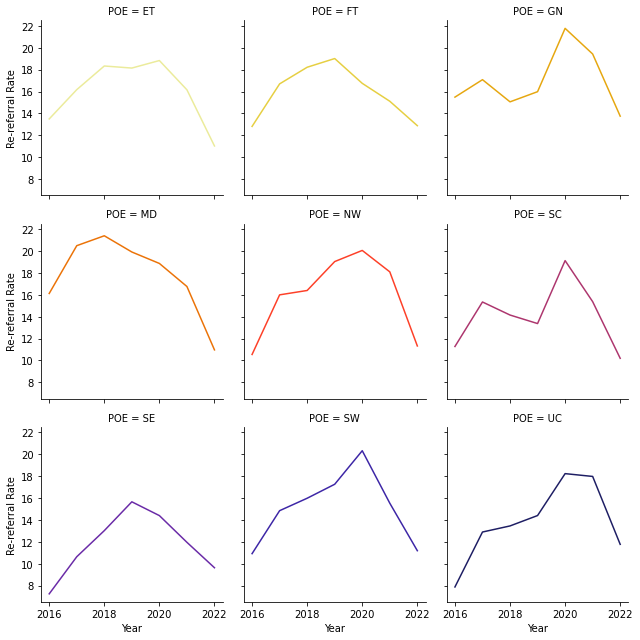

In [58]:
ti = sns.FacetGrid(poey_rate, col="POE", col_wrap=3, hue="POE", palette = 'CMRmap_r')
ti.map_dataframe(sns.lineplot, x="Year", y="Re-referral Rate")
ti.set_axis_labels("Year", "Re-referral Rate");

#### POE List
    - FT: First Tennessee
    - UC: Upper Cumberland
    - NW Northwest
    - ET: East Tennessee
    - GN: Greater Nashville
    - SW: Southwest
    - SE: Southeast
    - SC: South Central
    - MD: Memphis Delta

### Bullet 2
A referral is considered a "successful" referral if it results in an Individualized Family Service Plan (IFSP). 

    -Are there referral sources that have had higher rates of successful referrals? 

You can determine whether a referral was successful by looking at whether the Initial IFSP Date column is filled in or whether the Child Phase column is equal to IFSP.

In [59]:
ifsp = teis_merge2.loc[teis_merge2['Child Phase'] == 'IFSP']
ifsp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45518 entries, 4 to 114363
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype          
---  ------                     --------------  -----          
 0   Child ID                   45518 non-null  int64          
 1   Notification Date          45518 non-null  datetime64[ns] 
 2   Fiscal Year                45361 non-null  object         
 3   Notification Month         45361 non-null  object         
 4   Tenn Region                45361 non-null  object         
 5   Fiscal Year.1              45361 non-null  float64        
 6   third_DOB                  45361 non-null  datetime64[ns] 
 7   Late Referral              585 non-null    float64        
 8   Qtr                        45361 non-null  float64        
 9   POE                        45518 non-null  object         
 10  DOB                        45518 non-null  datetime64[ns] 
 11  County Name                45518 non-null  object    

### Bullet 3
Some areas of potential concern are POEs having a:

        -low proportion of referrals, 
        -a high average age of referrals, 
        -a low percent of total referrals resulting in an IFSP or 
        -a lower percent of eligible referrals resulting in an IFSP. 
        
    -How do POEs compare on these metrics, and 
    -which POEs are of concern on the basis of one or more of the listed criteria?

### Bullet 4
Look for patterns in referrals and re-referrals on the basis of the following:

    - Age
    - Referral source
    - Socioeconomic status (County SES)

### Bullet 5
TEIS provides services to eligible infants and toddlers from birth to age 3. 

    -Are there any POE or service coordinators with high rates of early closure (a child exiting before reaching age 3)? 
    -For this question, only consider cases which have reached the IFSP phase.

In [60]:
ifsp

,Child ID,Notification Date,Fiscal Year,Notification Month,Tenn Region,Fiscal Year.1,third_DOB,Late Referral,Qtr,POE,...,Parent Consent,Referral Source Type Name,Initial Eligibility,Initial Eligibility Date,Initial IFSP Date,Latest IFSP,Exit Reason,Exit Date,Year,Referral Age
4,353805,2016-08-05,2016-2017,Aug,Middle,2016.0,2016-12-04,NaN,1.0,UC,...,2016-08-15,Dept. of Health,Eligible,10/5/2016,10/10/2016,NaN,618 - Part B eligibility not determined,2016-12-03,2016,975 days
8,354276,2016-08-04,2016-2017,Aug,Eastern,2016.0,2016-12-24,NaN,1.0,ET,...,2016-08-12,DCS,Eligible,9/7/2016,9/22/2016,9/22/2016,618 - Parent withdraw,2016-09-22,2016,954 days
15,358011,2016-10-21,2016-2017,Oct,Eastern,2016.0,2017-02-02,NaN,2.0,ET,...,2016-10-24,Parent,Eligible,12/19/2014,6/26/2015,1/12/2017,618 - Part B eligible,2017-02-01,2016,992 days
16,358031,2016-08-10,2016-2017,Aug,Eastern,2016.0,2017-01-14,NaN,1.0,FT,...,2016-08-31,PCP,Eligible,9/12/2016,9/20/2016,10/18/2016,618 - Part B eligible,2017-01-13,2016,939 days
18,358765,2016-08-17,2016-2017,Aug,Eastern,2016.0,2017-02-04,NaN,1.0,FT,...,2016-09-06,Parent,Eligible,9/15/2016,9/27/2016,10/19/2016,618 - Part B eligible,2017-02-03,2016,925 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114258,530139,2022-06-08,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NW,...,2022-06-20,Parent,Eligible,6/23/2022,6/27/2022,6/27/2022,NaN,NaT,2022,763 days
114296,530190,2022-06-09,NaN,NaN,NaN,NaN,NaT,NaN,NaN,GN,...,2022-06-15,PCP,Eligible,6/20/2022,6/30/2022,6/30/2022,NaN,NaT,2022,555 days
114301,530196,2022-06-09,NaN,NaN,NaN,NaN,NaT,NaN,NaN,SC,...,2022-06-15,PCP,Eligible,6/22/2022,6/24/2022,6/24/2022,NaN,NaT,2022,733 days
114319,530214,2022-06-09,NaN,NaN,NaN,NaN,NaT,NaN,NaN,UC,...,2022-06-20,PCP,Eligible,6/23/2022,6/28/2022,6/28/2022,NaN,NaT,2022,513 days


In [61]:
ifsp_exit = ifsp.dropna(subset=['Exit Date'])
ifsp_exit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36039 entries, 4 to 113003
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype          
---  ------                     --------------  -----          
 0   Child ID                   36039 non-null  int64          
 1   Notification Date          36039 non-null  datetime64[ns] 
 2   Fiscal Year                35940 non-null  object         
 3   Notification Month         35940 non-null  object         
 4   Tenn Region                35940 non-null  object         
 5   Fiscal Year.1              35940 non-null  float64        
 6   third_DOB                  35940 non-null  datetime64[ns] 
 7   Late Referral              573 non-null    float64        
 8   Qtr                        35940 non-null  float64        
 9   POE                        36039 non-null  object         
 10  DOB                        36039 non-null  datetime64[ns] 
 11  County Name                36039 non-null  object    

In [62]:
ifsp_exit

,Child ID,Notification Date,Fiscal Year,Notification Month,Tenn Region,Fiscal Year.1,third_DOB,Late Referral,Qtr,POE,...,Parent Consent,Referral Source Type Name,Initial Eligibility,Initial Eligibility Date,Initial IFSP Date,Latest IFSP,Exit Reason,Exit Date,Year,Referral Age
4,353805,2016-08-05,2016-2017,Aug,Middle,2016.0,2016-12-04,NaN,1.0,UC,...,2016-08-15,Dept. of Health,Eligible,10/5/2016,10/10/2016,NaN,618 - Part B eligibility not determined,2016-12-03,2016,975 days
8,354276,2016-08-04,2016-2017,Aug,Eastern,2016.0,2016-12-24,NaN,1.0,ET,...,2016-08-12,DCS,Eligible,9/7/2016,9/22/2016,9/22/2016,618 - Parent withdraw,2016-09-22,2016,954 days
15,358011,2016-10-21,2016-2017,Oct,Eastern,2016.0,2017-02-02,NaN,2.0,ET,...,2016-10-24,Parent,Eligible,12/19/2014,6/26/2015,1/12/2017,618 - Part B eligible,2017-02-01,2016,992 days
16,358031,2016-08-10,2016-2017,Aug,Eastern,2016.0,2017-01-14,NaN,1.0,FT,...,2016-08-31,PCP,Eligible,9/12/2016,9/20/2016,10/18/2016,618 - Part B eligible,2017-01-13,2016,939 days
18,358765,2016-08-17,2016-2017,Aug,Eastern,2016.0,2017-02-04,NaN,1.0,FT,...,2016-09-06,Parent,Eligible,9/15/2016,9/27/2016,10/19/2016,618 - Part B eligible,2017-02-03,2016,925 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112126,527606,2022-04-27,2021-2022,Apr,Middle,2021.0,2024-12-09,NaN,4.0,SC,...,2022-04-30,PCP,Eligible,5/23/2022,6/14/2022,6/14/2022,618 - Moved out of state,2022-06-27,2022,139 days
112129,527609,2022-04-27,2021-2022,Apr,Western,2021.0,2022-08-26,NaN,4.0,MD,...,2022-05-19,Parent,Eligible,6/1/2022,6/7/2022,6/7/2022,618 - Parent withdraw,2022-06-13,2022,975 days
112174,527688,2022-04-28,2021-2022,Apr,Middle,2021.0,2023-04-24,NaN,4.0,SC,...,2022-05-02,PCP,Eligible,5/9/2022,5/18/2022,5/18/2022,618 - Parent withdraw,2022-06-08,2022,734 days
112689,528318,2022-05-09,2021-2022,May,Western,2021.0,2024-09-26,NaN,4.0,MD,...,2022-05-19,PCP,Eligible,5/27/2022,6/7/2022,6/7/2022,618 - Attempts to contact unsuccessful,2022-07-01,2022,225 days


In [63]:
ifsp_exit['Exit Age in m'] = (ifsp_exit['Exit Date']-ifsp_exit['DOB']).astype('timedelta64[M]')
ifsp_exit['Exit Age in m']

C:\Users\dada2\AppData\Local\Temp\ipykernel_5664\3034513916.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ifsp_exit['Exit Age in m'] = (ifsp_exit['Exit Date']-ifsp_exit['DOB']).astype('timedelta64[M]')


4         35.0
8         32.0
15        35.0
16        35.0
18        35.0
          ... 
112126     6.0
112129    33.0
112174    25.0
112689     9.0
113003    20.0
Name: Exit Age in m, Length: 36039, dtype: float64

In [64]:
ifsp_exit['Exit Age in d'] = ifsp_exit['Exit Date']-ifsp_exit['DOB']
ifsp_exit['Exit Age in d']

C:\Users\dada2\AppData\Local\Temp\ipykernel_5664\2228021058.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ifsp_exit['Exit Age in d'] = ifsp_exit['Exit Date']-ifsp_exit['DOB']


4        1095 days
8        1003 days
15       1095 days
16       1095 days
18       1095 days
            ...   
112126    200 days
112129   1022 days
112174    775 days
112689    278 days
113003    620 days
Name: Exit Age in d, Length: 36039, dtype: timedelta64[ns]

In [65]:
ifsp_exit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36039 entries, 4 to 113003
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype          
---  ------                     --------------  -----          
 0   Child ID                   36039 non-null  int64          
 1   Notification Date          36039 non-null  datetime64[ns] 
 2   Fiscal Year                35940 non-null  object         
 3   Notification Month         35940 non-null  object         
 4   Tenn Region                35940 non-null  object         
 5   Fiscal Year.1              35940 non-null  float64        
 6   third_DOB                  35940 non-null  datetime64[ns] 
 7   Late Referral              573 non-null    float64        
 8   Qtr                        35940 non-null  float64        
 9   POE                        36039 non-null  object         
 10  DOB                        36039 non-null  datetime64[ns] 
 11  County Name                36039 non-null  object    

In [66]:
all_early_exits = ifsp_exit
all_early_exits

,Child ID,Notification Date,Fiscal Year,Notification Month,Tenn Region,Fiscal Year.1,third_DOB,Late Referral,Qtr,POE,...,Initial Eligibility,Initial Eligibility Date,Initial IFSP Date,Latest IFSP,Exit Reason,Exit Date,Year,Referral Age,Exit Age in m,Exit Age in d
4,353805,2016-08-05,2016-2017,Aug,Middle,2016.0,2016-12-04,NaN,1.0,UC,...,Eligible,10/5/2016,10/10/2016,NaN,618 - Part B eligibility not determined,2016-12-03,2016,975 days,35.0,1095 days
8,354276,2016-08-04,2016-2017,Aug,Eastern,2016.0,2016-12-24,NaN,1.0,ET,...,Eligible,9/7/2016,9/22/2016,9/22/2016,618 - Parent withdraw,2016-09-22,2016,954 days,32.0,1003 days
15,358011,2016-10-21,2016-2017,Oct,Eastern,2016.0,2017-02-02,NaN,2.0,ET,...,Eligible,12/19/2014,6/26/2015,1/12/2017,618 - Part B eligible,2017-02-01,2016,992 days,35.0,1095 days
16,358031,2016-08-10,2016-2017,Aug,Eastern,2016.0,2017-01-14,NaN,1.0,FT,...,Eligible,9/12/2016,9/20/2016,10/18/2016,618 - Part B eligible,2017-01-13,2016,939 days,35.0,1095 days
18,358765,2016-08-17,2016-2017,Aug,Eastern,2016.0,2017-02-04,NaN,1.0,FT,...,Eligible,9/15/2016,9/27/2016,10/19/2016,618 - Part B eligible,2017-02-03,2016,925 days,35.0,1095 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112126,527606,2022-04-27,2021-2022,Apr,Middle,2021.0,2024-12-09,NaN,4.0,SC,...,Eligible,5/23/2022,6/14/2022,6/14/2022,618 - Moved out of state,2022-06-27,2022,139 days,6.0,200 days
112129,527609,2022-04-27,2021-2022,Apr,Western,2021.0,2022-08-26,NaN,4.0,MD,...,Eligible,6/1/2022,6/7/2022,6/7/2022,618 - Parent withdraw,2022-06-13,2022,975 days,33.0,1022 days
112174,527688,2022-04-28,2021-2022,Apr,Middle,2021.0,2023-04-24,NaN,4.0,SC,...,Eligible,5/9/2022,5/18/2022,5/18/2022,618 - Parent withdraw,2022-06-08,2022,734 days,25.0,775 days
112689,528318,2022-05-09,2021-2022,May,Western,2021.0,2024-09-26,NaN,4.0,MD,...,Eligible,5/27/2022,6/7/2022,6/7/2022,618 - Attempts to contact unsuccessful,2022-07-01,2022,225 days,9.0,278 days


In [67]:
all_early_exits.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36039 entries, 4 to 113003
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype          
---  ------                     --------------  -----          
 0   Child ID                   36039 non-null  int64          
 1   Notification Date          36039 non-null  datetime64[ns] 
 2   Fiscal Year                35940 non-null  object         
 3   Notification Month         35940 non-null  object         
 4   Tenn Region                35940 non-null  object         
 5   Fiscal Year.1              35940 non-null  float64        
 6   third_DOB                  35940 non-null  datetime64[ns] 
 7   Late Referral              573 non-null    float64        
 8   Qtr                        35940 non-null  float64        
 9   POE                        36039 non-null  object         
 10  DOB                        36039 non-null  datetime64[ns] 
 11  County Name                36039 non-null  object    

In [68]:
all_early_exits['POE'].count()

36039

In [69]:
all_early_exits = ifsp_exit.loc[ifsp_exit['Exit Age in d'] < '1092 days']
all_early_exits.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15479 entries, 8 to 113003
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype          
---  ------                     --------------  -----          
 0   Child ID                   15479 non-null  int64          
 1   Notification Date          15479 non-null  datetime64[ns] 
 2   Fiscal Year                15441 non-null  object         
 3   Notification Month         15441 non-null  object         
 4   Tenn Region                15441 non-null  object         
 5   Fiscal Year.1              15441 non-null  float64        
 6   third_DOB                  15441 non-null  datetime64[ns] 
 7   Late Referral              26 non-null     float64        
 8   Qtr                        15441 non-null  float64        
 9   POE                        15479 non-null  object         
 10  DOB                        15479 non-null  datetime64[ns] 
 11  County Name                15479 non-null  object    

In [70]:
all_early_exits['Exit Reason'].value_counts()

618 - Parent withdraw                                                   9639
618 - Attempts to contact unsuccessful                                  3555
618 - Moved out of state                                                1504
618 - Completion of IFSP/ no longer requires services                    309
618 - Part B eligibility not determined                                  190
618 - Part B eligible                                                    135
618 - Deceased                                                            98
618 - Not eligible for Part B – Exit with referral to other programs      26
618 - Not eligible for Part B – Exit with no referrals                    23
Name: Exit Reason, dtype: int64

In [71]:
early_exits = all_early_exits.loc[~all_early_exits['Exit Reason'].isin(['618 - Deceased', '618 - Moved out of state', '618 - Completion of IFSP/ no longer requires services'])]
early_exits

,Child ID,Notification Date,Fiscal Year,Notification Month,Tenn Region,Fiscal Year.1,third_DOB,Late Referral,Qtr,POE,...,Initial Eligibility,Initial Eligibility Date,Initial IFSP Date,Latest IFSP,Exit Reason,Exit Date,Year,Referral Age,Exit Age in m,Exit Age in d
8,354276,2016-08-04,2016-2017,Aug,Eastern,2016.0,2016-12-24,NaN,1.0,ET,...,Eligible,9/7/2016,9/22/2016,9/22/2016,618 - Parent withdraw,2016-09-22,2016,954 days,32.0,1003 days
52,364743,2016-07-06,2016-2017,Jul,Middle,2016.0,2017-03-13,NaN,1.0,GN,...,Eligible,7/3/2014,7/17/2014,NaN,618 - Parent withdraw,2016-07-08,2016,846 days,27.0,848 days
57,365848,2016-09-08,2016-2017,Sep,Eastern,2016.0,2017-04-03,NaN,1.0,ET,...,Eligible,6/26/2014,7/17/2014,1/21/2015,618 - Attempts to contact unsuccessful,2016-10-12,2016,889 days,30.0,923 days
67,368391,2016-08-23,2016-2017,Aug,Western,2016.0,2017-06-15,NaN,1.0,SW,...,Eligible,9/16/2016,9/23/2016,9/23/2016,618 - Attempts to contact unsuccessful,2017-05-23,2016,800 days,35.0,1073 days
107,379122,2017-02-13,2016-2017,Feb,Middle,2016.0,2017-05-02,1.0,3.0,UC,...,Eligible,3/10/2017,3/23/2017,NaN,618 - Parent withdraw,2017-04-19,2017,1018 days,35.0,1083 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111980,527434,2022-04-25,2021-2022,Apr,Middle,2021.0,2023-01-10,NaN,4.0,UC,...,Eligible,5/6/2022,5/11/2022,5/11/2022,618 - Parent withdraw,2022-06-09,2022,836 days,28.0,881 days
112129,527609,2022-04-27,2021-2022,Apr,Western,2021.0,2022-08-26,NaN,4.0,MD,...,Eligible,6/1/2022,6/7/2022,6/7/2022,618 - Parent withdraw,2022-06-13,2022,975 days,33.0,1022 days
112174,527688,2022-04-28,2021-2022,Apr,Middle,2021.0,2023-04-24,NaN,4.0,SC,...,Eligible,5/9/2022,5/18/2022,5/18/2022,618 - Parent withdraw,2022-06-08,2022,734 days,25.0,775 days
112689,528318,2022-05-09,2021-2022,May,Western,2021.0,2024-09-26,NaN,4.0,MD,...,Eligible,5/27/2022,6/7/2022,6/7/2022,618 - Attempts to contact unsuccessful,2022-07-01,2022,225 days,9.0,278 days


In [72]:
# early_exits = all_early_exits.loc['Service Coordinator'] > '2'
# early_exits

In [73]:
early_exits['Exit Age in m'].value_counts()

34.0    753
32.0    698
31.0    694
35.0    684
33.0    647
25.0    606
29.0    604
30.0    600
27.0    591
28.0    588
26.0    532
24.0    471
22.0    471
21.0    431
23.0    431
20.0    379
19.0    372
18.0    364
13.0    331
14.0    325
15.0    310
17.0    310
12.0    279
16.0    274
11.0    260
9.0     249
8.0     224
10.0    220
7.0     208
6.0     179
5.0     172
4.0     128
3.0     101
2.0      57
1.0      24
0.0       1
Name: Exit Age in m, dtype: int64

In [74]:
early_exits['Exit Age in d'].value_counts()

1091 days    65
1077 days    40
783 days     38
1039 days    37
1064 days    37
             ..
38 days       1
90 days       1
109 days      1
39 days       1
56 days       1
Name: Exit Age in d, Length: 1042, dtype: int64

In [75]:
POE_exits = ifsp_exit.groupby('POE')['Child ID'].count()
POE_exits = POE_exits.to_frame().reset_index()
POE_exits = POE_exits.rename(columns = {'Child ID' : 'Total Exits'})
POE_exits

,POE,Total Exits
0,ET,5920
1,FT,3749
2,GN,5890
3,MD,4847
4,NW,1701
5,SC,5544
6,SE,2722
7,SW,2050
8,UC,3616


In [76]:
POE_early_exits = early_exits.groupby('POE')['Child ID'].count()
POE_early_exits = POE_early_exits.to_frame().reset_index()
POE_early_exits = POE_early_exits.rename(columns = {'Child ID' : 'Total Early Exits'})
POE_early_exits

,POE,Total Early Exits
0,ET,2389
1,FT,1434
2,GN,1849
3,MD,1785
4,NW,763
5,SC,1871
6,SE,989
7,SW,1062
8,UC,1426


In [77]:
POE_early_exit_rate = pd.merge(POE_exits, POE_early_exits, how = 'left').fillna(0)
POE_early_exit_rate['Exit rate'] = round((POE_early_exit_rate['Total Early Exits']/POE_early_exit_rate['Total Exits']) *100,2)
POE_early_exit_rate

,POE,Total Exits,Total Early Exits,Exit rate
0,ET,5920,2389,40.35
1,FT,3749,1434,38.25
2,GN,5890,1849,31.39
3,MD,4847,1785,36.83
4,NW,1701,763,44.86
5,SC,5544,1871,33.75
6,SE,2722,989,36.33
7,SW,2050,1062,51.80
8,UC,3616,1426,39.44


In [78]:
full_palette = ["#D9ED92", "#B5E48C", "#99D98C", "#76C893", "#52B69A", "#34A0A4", "#168AAD", "#1A759F", "#1E6091", "#184E77"]

main_palette = ["#76C893", "#1E6091"]


In [79]:
POE_early_exit_rate.sort_values(by = 'Exit rate', ascending = False)

,POE,Total Exits,Total Early Exits,Exit rate
7,SW,2050,1062,51.80
4,NW,1701,763,44.86
0,ET,5920,2389,40.35
8,UC,3616,1426,39.44
1,FT,3749,1434,38.25
3,MD,4847,1785,36.83
6,SE,2722,989,36.33
5,SC,5544,1871,33.75
2,GN,5890,1849,31.39


NameError: name 'text' is not defined

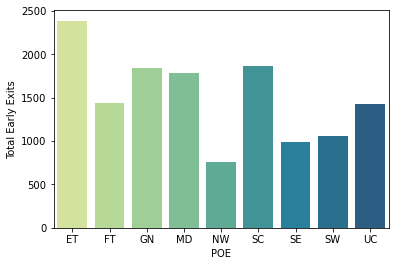

In [80]:
#sns.set_theme(style = 'whitegrid')
sns.barplot(data = POE_early_exit_rate, x= 'POE', y= 'Total Early Exits', palette = full_palette);
text(POE_early_exit_rate,
fontdict = dict(color = 'white', fontsize = 12), 
horizontalalignment = 'center')

In [81]:
SC_exits = ifsp_exit.groupby('Service Coordinator')['Child ID'].count()
SC_exits = SC_exits.to_frame().reset_index()
SC_exits = SC_exits.rename(columns = {'Child ID' : 'Total Exits'})
SC_exits = SC_exits[SC_exits['Total Exits'] > 3]
SC_exits

,Service Coordinator,Total Exits
0,A.J. Cowan,59
1,Aaron Collins,153
2,Abigail Gettinger,17
3,Adrianne McPeake,71
5,Alexis Hunt,58
...,...,...
322,Virginia Thomas,43
323,Wendy Burton,214
324,Wendy Freeman,7
325,Yalunda Whiteside,272


In [82]:
SC_exits['Total Exits'].sum()

35983

In [83]:
SC_early_exits = early_exits.groupby('Service Coordinator')['Child ID'].count()
SC_early_exits = SC_early_exits.to_frame().reset_index()
SC_early_exits = SC_early_exits.rename(columns = {'Child ID' : 'Total Early Exits'})
SC_early_exits

,Service Coordinator,Total Early Exits
0,A.J. Cowan,29
1,Aaron Collins,68
2,Abigail Gettinger,9
3,Adrianne McPeake,37
4,Aleshia Stewart,1
...,...,...
304,Virginia Thomas,15
305,Wendy Burton,106
306,Wendy Freeman,2
307,Yalunda Whiteside,165


In [84]:
SC_early_exit_rate = pd.merge(SC_exits, SC_early_exits)
SC_early_exit_rate['Exit Rate'] = round((SC_early_exit_rate['Total Early Exits'] / SC_early_exit_rate['Total Exits'])*100, 2)

SC_early_exit_rate

,Service Coordinator,Total Exits,Total Early Exits,Exit Rate
0,A.J. Cowan,59,29,49.15
1,Aaron Collins,153,68,44.44
2,Abigail Gettinger,17,9,52.94
3,Adrianne McPeake,71,37,52.11
4,Alexis Hunt,58,30,51.72
...,...,...,...,...
281,Virginia Thomas,43,15,34.88
282,Wendy Burton,214,106,49.53
283,Wendy Freeman,7,2,28.57
284,Yalunda Whiteside,272,165,60.66


<AxesSubplot:xlabel='Exit Rate', ylabel='Service Coordinator'>

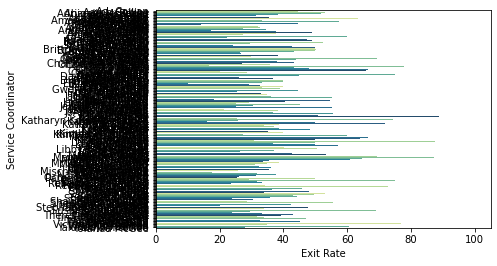

In [85]:
sns.barplot(data = SC_early_exit_rate, x = 'Exit Rate', y = 'Service Coordinator', palette = full_palette )

new